# Customer/Cities Segmentation: KMeans Clustering
### Goal:

- Group customers or cities by patterns in their purchasing behavior (e.g., high spend, high frequency, recentness) using clustering.

- These clusters can be used for targeted marketing, city-specific campaigns, or inventory/state-level planning.

In [10]:
import ast
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df1 = pd.read_csv(r'C:\Users\lenovo\Documents\archive\Orders.csv')
df2 = pd.read_csv(r'C:\Users\lenovo\Documents\archive\Details.csv')

df = pd.merge(df1,df2,on='Order ID',how='inner')
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y', errors='coerce')

In [11]:
snapshot_date = df['Order Date'].max() + pd.Timedelta(days=1)
recency = df.groupby('CustomerName')['Order Date'].max().apply(lambda x: (snapshot_date - x).days)
frequency = df.groupby('CustomerName')['Order ID'].nunique()
monetary = df.groupby('CustomerName')['Amount'].sum()

rfm = pd.DataFrame({'Recency': recency, 'Frequency': frequency, 'Monetary': monetary}).reset_index()

In [12]:
X = rfm[['Recency', 'Frequency', 'Monetary']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

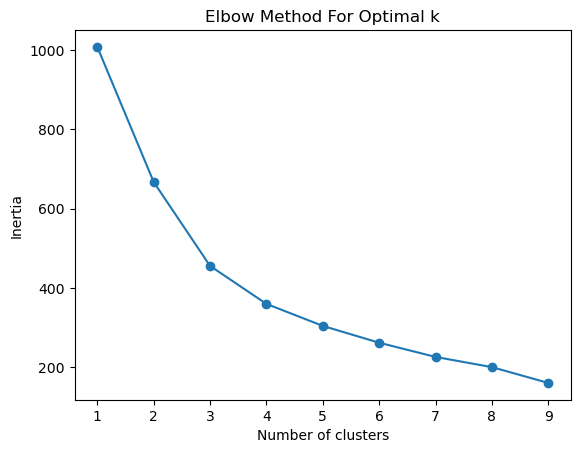

In [21]:
inertias = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(K, inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [23]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(X_scaled)

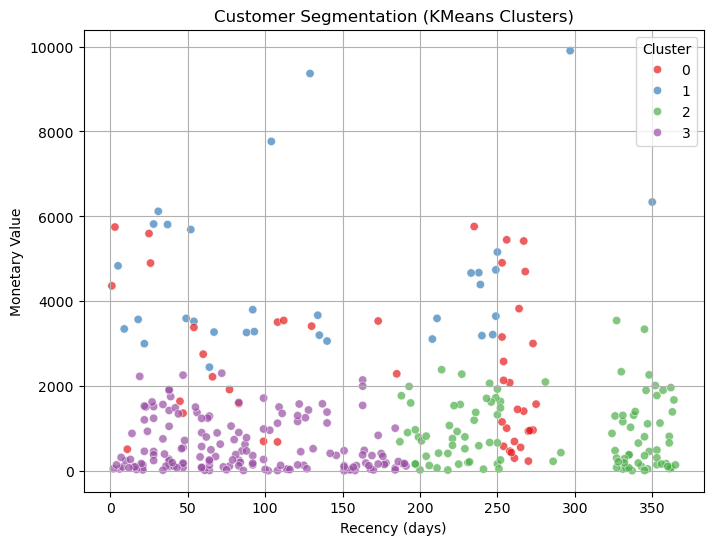

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=rfm['Recency'], y=rfm['Monetary'], hue=rfm['Cluster'], palette='Set1', alpha=0.7)
plt.title('Customer Segmentation (KMeans Clusters)')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary Value')
plt.grid(True)
plt.show()

In [35]:
cluster_summary = rfm.groupby('Cluster')[['Recency','Frequency','Monetary']].mean().round(1).reset_index()
cluster_sizes = rfm['Cluster'].value_counts().rename_axis('Cluster').reset_index(name='Customer_Count')
cluster_summary = pd.merge(cluster_summary, cluster_sizes, on='Cluster')
cluster_summary

,Cluster,Recency,Frequency,Monetary,Customer_Count
0,0,182.3,3.3,2434.6,45
1,1,136.3,1.5,4535.5,32
2,2,287.1,1.2,865.7,104
3,3,86.1,1.1,600.3,155
